# Chapter11 - Special basis

# 11.1 가장 가까운 k-스파스 벡터

- k-스파스 벡터: 많아야 k개의 영이 아닌 엔트리를 가진 벡터
- k-스파스 벡터가 아닌 벡터를 k-스파스 벡터와 동일한 컴팩트하게 표현하기 위한 계산 문제 
 - input: 벡터 b, 정수 k
 - output: b에 가장 가까운 k-스파스 벡터 $\tilde b$
- compression by suppresion
 - 간단한 프로시저로 $\tilde b$를 계산
 - 가장 큰 k개 엔트리 외 모두를 억제(즉, 영으로 할당)
 - 이 프로시저는 정말로 가장 가까운 $norm\left\|b-\tilde b \right\|$를 만족
 - 하지만 실세계(ex: 이미지)에서는 유용하지 않는다.

# 11.2 주어진 기저에 대한 표현이 k-스파스인 가장 가까운 벡터

- ** 이미지의 표준 기저: 각 픽셀을 명시하는 벡터**
- 만약 이미지가 다른 기저로 표현되고 이때 스파스하다면 효율적으로 압축을 할 수 있다.

### Computational Problem 11.2.1
주어진 기저로 된 표현이 스파스인 가장 가까운 벡터
- input: D-벡터 b, 정수 k, $\mathbb R^D$에 대한 기저 $u_1,...,u_{|D|}$
- output: $u_1,...,u_{|D|}$에 대한 표현이 k-스파스인 벡터들 중에서 b에 가장 가까운 벡터 $\tilde b$

## 12.2.1 법선 기저에 대한 좌표표현 찾기

억제에 의한 압축을 적용하는 첫 번째 단계는 원래의 이미지 벡터를 기저 $u_1,...,u_n$에 대한 표현으로 바꾸는 것이다.
- $Qx=b$
  - Q는 열들이 $u_1,...,u_n$인 행렬
  - b는 원래의 이미지 벡터
- Q가 직교행렬이면 역행렬은 $Q^T$으로 $x=Q^Tb$를 계산할 수 있고, 행렬-벡터 곱셈을 수행하기만 하면 된다.
- 이미지의 스파스 표현(spase representation)인 $\tilde x$을 전송하려고 한다. 사용자는 $\tilde x$를 받아 $Q^\tilde x$를 계산한다. 하지만 $n^2$의 연산이 필요하다.
- 계산을 간략하게 해주는 특정한 정규직교 기저인 웨이브릿(wavelet) 기저가 사용될 것이다.

## 12.2.2. Norm을 보존하는 열-직교행렬에 의한 곱셈

### Lemma 11.2.2
Q는 열-직교행렬이라 하자. 벡터에 Q를 곱해도 내적은 보존된다. 즉, 임의의 벽터 u와 v에 대해 다음이 성립한다.

$\quad <Qu, Qv>=<u, v>$

### Corollary 11.2.3
임의의 열-직교행렬 Q와 벡터 u에 대해, $\left\|Qu\right\| = \left\|u\right\|$이다.

___
$Qx=b$이고 $Q\tilde x = \tilde b$이므로, 위 corollary는 $\left\|b-\tilde b\right\|=\left\|Qx- Q\tilde x \right\|=\left\|x-\tilde x\right\|$임을 의미한다. 이것은 b에 가장 가까운 벡터를 찾는 것은 x에 가까운 표현을 찾는 것과 동등함을 의미한다.

# 11.3 웨이브릿(Wavelets)

- 어떤 목적(압축을 포함하여)을 위해서는 **정규직교** 기저를 사용하는 것이 편리하다.
- 다운 샘플링된 이미지의 밝기는 원래 이미지의 밝기의 평균이다. 이러한 반복된 서브샘플링의 아이디어에서 웨이브릿의 개념이 비롯되었다.

## 11.3.1 다른 해상도의 1차원 '이미지'

- 이미지에 대한 전통적인 표현은 픽셀 밝기의 시퀀스 $x_0,...,x_{n-1}$이다.
- 이미지에 대한 웨이브릿은 다른 해상도의 서브샘플들을 고려함으로써 얻을 것이다.
- 서브샘플의 이미지들을 하나의 벡터공간 내의 벡터들로서 볼 수 있게 하는 선형대수적 기법을 사용할 것이다. 그래서, 직교여공간의 개념을 사용할 수 있다.
___
- $V_{16}$은 공간 $\mathbb R^{16}$이다.
- $V_{16}$을 표준기저로 표현하고 이를 박스기저라고 하고 벡터 $b^{16}_0,...,b^{16}_{15}$라고 명명한다.
- 1/2로 다운샘플링된(주변을 평균하여) 이미지를 $V_8$의 공간으로 표현하고 이때의 박스기저를 $b^{8}_0,...,b^{8}_{7}$라고 하자.
- 유사하게 1/4, 1/8, 1/16으로 다운샘플링된 이미지를 $V_4, V_2, V_1$에 대해 박스기저를 알 수 있다.
- 일반적으로 $V_k$에 대한 박스 기저는 k 벡터들로 구성된다. 벡터 i는 위치 $ki, ki+1, ki+2, ..., ki+(k-1)$에 1을 가지고 다른 곳에서는 영을 가진다.

## 11.3.2 $V_n$을 직합으로 분해하기

- 웨이브릿 $W_k$: $V_{2k}$에 속하는 $V_k$의 직교여공간이라고 정의하자.
- Orthogonal Complement Theorem에 의하면,  
$\quad V_{2k}=V_k\oplus W_k$  
  k=8,4,2,1을 대입하면 다음을 얻는다.  
$\quad V_{16}=V_8\oplus W_8$  
$\quad V_{8}=V_4\oplus W_4$  
$\quad V_{4}=V_2\oplus W_2$  
$\quad V_{2}=V_1\oplus W_1$  
  대입을 반복하여 정리하면, 다음을 얻는다.  
$\quad V_{16}=V_1\oplus W_1\oplus W_2\oplus W_4\oplus W_8$
- Haar 기저  
   Haar 기저를 형성하는 벡터들을 웨이브릿 벡터들이라고 한다.  
$V_{n}=V_1\oplus W_1\oplus W_2\oplus W_4...\oplus W_{n/2}$  
$V_n$에 대한 Haar 기저는 $V_1, W_1, W_2, ..., W_{n/2}$이다.
  

## 11.3.3 웨이브릿 기저

- $W_k$는 $V_{2k}$에 속하는 $V_k$의 직교여공간이다.
- $W_k$를 계산하기 $V_{2k}$의 기저를 $V_k$ 기저에 직교하게 투영한다.  
 $W_8$에 대한 생성자를 얻기 위해 $V_{16}$의 기절르 $V_8$에 대한 기저에 직교하게 투영한다. 다수의 직교 벡터를 얻는데, 그중 절반은 영이고 나머지는 절반은 $W_9$에 대한 기저를 형성한다.  
 $W^8_0,...,W^8_7$이라고 한다.
- $W^k_i$은 두 개의 인접한 엔트리들은 0.5와 -0.5를 가지며, 모든 다른 엔트리들은 영을 가진다.  

## 11.3.4 $V_1$에 대한 기저

- $V_1$에 대한 기저는 1-픽셀 이미지의 공간이며 단일 벡터로 구성된다.
- $V_16$에 대한 Haar 웨이브릿 기저는 $W^8, W^4, W^2, W^1, V_1$의 기저들의 형성된다.

## 11.3.5 n이 일반적인 경우

- n이 16이 아닌 일반적인 경우의 Haar 웨이브릿 기저를 고려하고자 한다.
- 모든 2의 거듭제봅 $s \leq n$에 대해, $W_k$에 대한 기저 벡터들은 $w^s_0,...,w^s_{k-1}$로 나타낸다. 벡터 $W^s_i$는 엔트리 (n/k)i, (n/k)i+1,...,n/2k-1에는 1/2, 엔트리 (n/k)i+n/2k, (n/k)i+n/2k+1, (n/k)i+1,...,n/k-1에는 -1/2, 그리고 모든 다른 엔트리에서는 영을 가진다.
- 이러한 각 벡터의 제곱 norm은 다음과 같다.  
$\left\|w^s_i\right\|^2=(n/k)(\frac{1}{2})^2 = n / 4s$
- $V_1$에 대한 기저 벡터 $b^1_0$은 n 개 엔트리의 각각에서 1를 가진다. 그러므로 이 벡터의 제곱 norm은 다음과 같다.  
$\left\|b^1_0\right\|^2=n$

## 13.3.6 웨이브릿 변환의 첫 번째 단계

- $V_16$ 공간의 v는 1차원 이미지 벡터라고 하면 다음과 같이 표현된다.  
$v=\alpha_0b^{16}_0+...+\alpha_{15}b^{16}_{15}$
- 이 벡터를 기저 $b^8_0,...,b^8_7, w^8_0,...,w^8_7$에 대해 표현하는 것이다. 즉 아래식의 $x_i, y_i$를 원한다.  
$v=x_0b^8_0+...+x_7b^8_7+y_0w^8_0+...+y_7w^8_7$
- **위 식의 우변의 벡터들은 서로 직교하므로, 우변의 각 항은 대응하는 벡터를 따른 v의 투영이다.**   
$x_i=(v\cdot b^8_i)/(b^8_i\cdot b^8_i)$  
$y_i=(v\cdot w^8_i)/(w^8_i\cdot w^8_i)$
- 일반적으로 i=0,1,...,7에 대해, $b^8_i$의 계수는 엔트리 2i와 2i+1의 평균이다.

In [1]:
def get_vnew(v):
    vnew = [(v[2*i]+v[2*i+1])/2 for i in range(len(v) // 2)]
    return vnew

- 일잔적으로 i=0,1,...7에 대해, $w^8_i$이 계수는 엔드리 2i에서 2i+1을 뺀 것이다.
- ** 직관적으로 박스 벡터들의 계수들은 밝이 썅들의 평균값들이고 웨이브릿 벡터들의 계수들은 그 차분값들이다.**

## 11.3.7 후속 레벨의 웨이브릿 분해

- 동일한 방식으로 $W^4, W^2, W^1, V^1$의 계수들을 계산한다.
- 이것이 $V_{16}$에 대한 웨이브릿 변환이다.  
  입력은 원래의 1차원 이미지의 픽셀들의 밝기로 이루어진 리스트이다.  
  출력은 다음으로 구성된다.  
  - 15개의 웨이브릿 계수, 즉 웨이브릿 벡터들의 계수 $w^8_0, ..., w^8_7, w^4_0,...,w^4_3, w^2_0, w^2_1, w^1_0$
  - 1-픽셀 이미지의 픽셀 밝기(전체 평균 밝기)
- n-픽셀 1차원 이미지의 경우(n은 2은 거듭제곱), 입력은 원래 이미지의 픽셀들의 밝기로 구성된 리스트이고 출력은 다음과 같다.  
 - 웨이브릿 계수들. 그 수는 다음과 같다.  
   n/2+n/4+...+2+1 = n-1
 - 전체 평균 밝기

## 11.3.8 정규화하기(Normalizing)
- 기술한 기저들은 정규직교가 아니아. 압축을 위해서는 벡터들을 정규직교 기저에 대해 표현하는 것이 더 낫다.
- 기저 벡터를 정규화하는 것은 그 벡터의 norm으로 나누것으로 구성된다. 
- 아래의 주어진 벡터 v에 대해,  
  $v=\alpha_1v_1+....+\alpha_nv_n$   
- 정규화된 표현은 다음과 같다.  
  $v=(\left\|v_1\right\|\alpha_1)\frac{v_1}{(\left\|v_1\right\|}+...+(\left\|v_n\right\|\alpha_n)\frac{v_n}{(\left\|v_n\right\|}$
- 웨이브릿 계수를 찾기 위해 위에서 기술한 프로시저는 정규화되지 않는 기저 벡터들의 계수들이다. 정규화된 기저 벡터들의 계수를 되도록 다음과 같이 조정한다.
  - 정규화되지 않는 Haar 웨이브릿 기저 벡터 $w^s_i$의 제곱 norm은 n/4s이다. 따라서, 계수는 $\sqrt{(n/4s)}$와 곱해져야 한다.
  - $V_1$에 대한 기저를 형성하는 박스 벡터 $b^1_0$의 제곱 norm은 n이다. 따라서, 계수는 $\sqrt n$과 곱해져야 한다.

## 11.3.9 역바향 변화(Backward transform)

- 웨이브릿 변환의 출력은 원래의 벡터공간에 대한 기저를 형성하는 벡터들로 구성된 집합의 계수들로 구성된다. 이때, 정보의 손실이 없으므로 역변환을 할 수 있다.
- 역방향 변환은 웨이브릿 계수들을 사용하녀 $V_2, V_4, V_8,...$의 박스 기저의 계수들을 순서대로 찾는다.

## 11.3.10 구현

Lab에서 순방향 및 역방향 변환을 구현할 것이다. 손실 있는 이미지 압축을 가지고 실험해 볼 것이다.

# 11.4 다항식 평가과 인터폴레이션(Interpolation)

- 차수가 d인 다항식(polynomial)
 - $f(x)=\alpha_01+\alpha_1x^1+...,\alpha_dx^d$
 - $\alpha$는 스칼라 값이며 *다항식의 계수*이다.
 - 차수가 d인 다항식을 계수 $\alpha_0, \alpha_1,...,\alpha_d$로 구성된 (d+1)-벡터로 명시할 수 있다.
- 다항식 평가
 - 다항식의 값을 얻는 것을 의미한다.
 - 만약 주어진 r에 대한 다항식의 값이 영이면, r은 그 다항식의 근(root)이라고 한다.

### Theorem 11.4.1
임의의 영이 아닌 차수가 d인 다항식 f(x)에 대해, f의 함수값이 영이 되는 x 값의 수는 많아야 d이다.

___
- $\alpha_1$을 제외한 모든 계수가 영이 되지 않는다면 다항식은 선형함수가 아니다. 하지만, 선형함수들이 숨어 있다. 즉, 주어진 수 r에 대해, 계수들의 벡터를 가지는 함수는 r에 대응하는 다항식의 값을 출격한다.
- k개의 수 $r_0, r_1,...,r_{k-1}$를 가지고 있다고 해 보자. 대응하는 선형함수는 차수 d인 다항식을 명시하는 계수들의 벡터($\alpha_0, ...,\alpha_d)$를 자기고 다음 요소로 구성되는 벡터를 출력한다.  
$\quad \begin{bmatrix} r^0_0 && r^1_0 && ... && r^d_0 \\ r^0_1 && r^1_1 && ... && r^d_1 \\  && ... &&  \\ r^0_{k-1} && r^1_{k-1} && ... && r^d_{k-1} \\ \\ \end{bmatrix} \begin{bmatrix}  \alpha_0 \\ \alpha_1 \\ \alpha_2 \\ ... \\ \alpha_d \end{bmatrix}$

### Theorem 11.4.2
$k=d+1$이고 $r_0,...,r_{k-1}$이 모두 같이 않은 경우, 이 함수는 가역함수이다.

___
- 다항식 인터폴레이션
 - 다항식 값들로부터 계수들을 얻는 과정
 - 다항식 인터폴레이션이션과 다항식 평가은 역함수이다.
- 다항식 평가과 인터폴레이션 장단점
 - 만약 완전히 새로운 수에 대해 다항식을 평가하고자 한다면, 계수들을 가지고 있는 것이 편리하다.
 - 만약 두 다항식을 곱하고자 한다면, 다항식 값들에 대한 표현을 사용하는 것이 더 쉽다. 즉, 다항식의 곱셈은 대응하는 값들을 곱하면 된다.
- 계수들에 대해 주어진 두 개의 차수가 d인 다항식을 곱하는 빠른 알고리즘
 1. 계수에 대한 표현을 값에 기반을 둔 표혀능로 바꾸고,
 2. 이러한 값에 기반을 둔 표현을 사용하여 곱셈을 수행하며,
 3. 곱셈 결과를 다시 계수에 대한 표혀으로 바꾸는 것으로 구성된다.
- 빠른 알고리즘이 되려면 다항식을 임의의 수에 대해 평가해서는 안되며 평가에 사용될 수를 잘 선택해야 한다. 이러한 핵심 서브루틴이 패스트 푸리에 알고리즘이다.

# 11.5 푸리에 변환(Fourier transform)

- 이산 푸리에(Discrete Fourier) 기저는 사인파들로 구성된다.
- 만약 사운드 샘플이 순음을 샘플링한 결과이고 이 순음의 주파수가 주의 깊게 선택된다면, 푸리에 기저로 된 사운드 샘플의 표현은 단지 하나의 영이 아닌 엔트리가 있는 아주 스파스한 것이 될 것이다.
- 일반적으로, 만약 사운드 샘플이 함께 더해진 단지 몇ㅁ쳐 순음드로 구성되면 푸리에 표현은 여전히 스파스할 것이다.

# 11.6 이산 푸리에 변환

## 11.6.1 지수의 법칙

- $e^ue^v = e^{u+v}$
- $(e^u)^v=e^{uv}$

## 11.6.2 n개 스톱워치(Stopwatch) 

- $\omega=e^{(2\pi/n)i}$
- $F(t)=\omega^t$, $F:\mathbb R \rightarrow \mathbb C$
 - $F(0) = 1+0i$
 - $F(n) = 1+0i$
 - $F(2n) = 1+0i$
 - $F(3n) = 1+0i$
 - F(t)는 단윈원을 도는 주기가 n인 함수이다(주파수는 1/n).
- $F_1(t)=\frac{1}{\sqrt n}\omega^t$
- $F_k(t) = \frac{1}{\sqrt n}(\omega^k)^t$
 - $F_0(t), F_1(t), F_{n-1}(t)$의 각각은 t=0에서 값 $\frac{1}{\sqrt n}+0i$를 가진다.
 - 모두 반지름이 $\frac{1}{\sqrt n}$인 원을 따라 돈다.
 - $F_k(t)$의 주기는 n/k(주파수는 k/n)이다. 
 - $F_0(t)$의 주기는 n/0으로 무한대이다. $F_0(t)$는 전혀 움직이지 않는다.

## 11.6.3 이산 푸리에 공간: 기저 함수 샘플링하기

- 푸리에 해석은 함수들을 이러한 시계들의 선형결합으로서 표현할 수 있게 해 준다.
- 이산 푸리에 해석은 t=0,1,2,...,n-1에서 샘플링된 함수 s(t)를 동일한 시간에서 샘플링된 시계들 $F_0(t), F_1(t),...F_{n-1}(t)$의 션형결합을 사용하여 나타낸다.
- 신호 s(t)의 샘플들은 벡터에 저장된다.  
$\begin{bmatrix}  s(0) \\ s(1) \\ s(2) \\ ... \\ s(n-1) \end{bmatrix}$
- 시계 $F_j(t)$의 샘플들은 벡터에 저장된다.  
$\begin{bmatrix}  F_j(0) \\ F_j(1) \\ F_j(2) \\ ... \\ F_j(n-1) \end{bmatrix}$
- 목적은 신호의 샘플들로 구성되는 벡터 s가 어떻게 시계들의 샘플들로 구성되는 벡터들의 선형결합으로 표현될 수 있는지이다.
- **푸리에 계수: 샘플이 시계들의 샘플로 구성되는 벡터들의 선형결합으로 표현될때의 계수**
 - $\phi_0, \phi_1, \phi_2, ..., \phi_{n-1}$
- 신호의 샘플과 시계들의 샘플의 관계를 $F_n\phi=s$로 표현  
$\quad \begin{bmatrix} F_0(0) && F_1(0) && ... && F_{n_1}(0) \\ F_0(1) && F_1(1) && ... && F_{n_1}(1) \\   F_0(2) && F_1(2) && ... && F_{n_1}(2) \\&& ... &&  \\ F_0(n-1) && F_1(n-1) && ... && F_{n_1}(n-1) \\ \\ \end{bmatrix} \begin{bmatrix}  \phi_0 \\ \phi_1 \\ \phi_2 \\ ... \\ \phi_{n-1} \end{bmatrix}=\begin{bmatrix}  s(0) \\ s(1) \\ s(2) \\ ... \\ s(n-1) \end{bmatrix}$
- 위의 방정식은 두 가지 표현을 서로 연관시킨다.
 - 신호의 샘플들에 대한 표현
 - 시계들의 가중치를 부여한 합으로서의 표현
- 방정식 $F_n\phi=s$는 두 표현 사이의 변환 방법을 알려준다.
 - 주어진 $\phi$에 대해, 왼쪽에 $F_n$을 곱하여 s를 얻을 수 있다.
 - 주어진 s에 대해, 행렬방정식의 해를 구함으로써 또는 왼쪽에 역행렬 $F^{-1}_n$을 곱함으로써 $\phi$를 얻을 수 있다.

## 11.6.4 푸리에 행렬의 역행렬

- 푸리에 행렬의 역행렬은 푸리에 행렬 그 자체와 아주 유사하다.
- $W(w, n)$행렬읠 정의해보자
 - $w=e^{\theta i}$
 - 행-라벨과 열-라벨 집합이 {0,1,2,..., n-1}
 - 엔트리 rc는 $w^{r\cdot c}$  
 - $\begin{bmatrix} w^{0\cdot 0} && w^{0\cdot 1} && ... && w^{0\cdot (n-1)} \\ w^{1\cdot 0} && w^{1\cdot 1} && ... && w^{1\cdot (n-1)} \\   w^{2\cdot 0} && w^{2\cdot 1} && ... && w^{2\cdot (n-1)}) \\&& ... &&  \\ w^{(n-1)\cdot 0} && w^{(n-1)\cdot 1} && ... && w^{(n-1)\cdot (n-1)} \\\end{bmatrix}$

In [2]:
def W(w, n):
    R = set(range(n))
    return Mat((R,R), {(r,c):w**(r*c) for r in R for c in R})

### Theorem 11.6.1 Fourier Inverse Theorem
$F_n=\frac{1}{\sqrt n}W(e^{2\pi i/n}, n)$  
$F_n^{-1}=\frac{1}{\sqrt n}W(e^{-2\pi i /n}, n)$

### Lemma 11.6.2
$W(e^{2\pi i/n}, n)W(e^{-2\pi i /n}, n)=n\mathbb I$

## 11.6.5 패스트 푸리에 알고리즘

패스트 푸리에 변환(FFT)은 다음 조건들이 만족할 경우, W(w,n)을 곱하기 위한 빠른 알고리즘이다.

**FFT의 전제 조건(precondition)**
- n은 2의 거듭제곱이다.
- $w^n=1$이다.  
O(nlogn)시간이 필요하며, n이 클 경우 단순 행렬-벡터 곱셈보다 훨씬 빠르다.

## 11.6.6 FFT 유도하기

FFT(w,s)의 스펙
- input
 - n개 복소수로 구성된 리스트 $s=[s_0,s_1,s_2,...,s_{n-1}]$(여기서 n은 2의 거듭제곱)
 - $w^n=1$을 만족하는 복소수 w
- output
 - 복소수들의 리스트 $[z_0,z_1,...,z_{n-1}]$ 이때, k=0,1,2,...,n-1에 대해 다음이 성립한다.  
 $z_k=s_0(w^k)^0+s_1(w^k)^1+...+s_{n-1}(w^k)^{n-1}$


리스트 s를 다항식 함수로 해석하면 편리하다.  
$\quad s(x)= s_0+s_1x+s_2x^2+...s_{n-1}x^{n-1}$  

s의 원소들을 절반의 원소들로 구성되는 두 개의 리스트로 나누자.  
$\quad s_{even}=[s_0,s_2,...,s_{n-2}]$  
$\quad s_{odd}=[s_1,s_3,...,s_{n-1}]$  

다항식 함수로 표현해보자.  
$\quad s_{even}=s_0+s_2x+...+s_{n-2}x^{\frac{n-2}{2}}$  
$\quad s_{odd}=s_1+s_3x+...+s_{n-1}x^{\frac{n-2}{2}}$  

이것을 다항식 s(x)로 표현할 수 있다.  
$\quad s(x) = s_{even}(x^2)+x\cdot s_{odd}(x^2)$

$s_{even},s_{odd}$를 평가하고 대응하는 값들을 결합함으로써 FFT의 목적인 $w^0,w^1,...,w^{n-1}$에서 s(x)를 평가하는 것이 이루어진다.  
$\quad s(w^0)=s_{even}((w^0)^2)+w^0s_{odd}((w^0)^2)$  
$\quad s(w^1)=s_{even}((w^1)^2)+w^0s_{odd}((w^1)^2)$  
$\quad ...$  
$\quad s(w^{n-1})=s_{even}((w^{n-1})^2)+w^{n-1}s_{odd}((w^{n-1})^2)$

Precondition 11.6.5에 의해 $w^n=1$이다. 그래서 다음이 성립한다.  
$\quad (w^0)^2=(w^0)^2(w^\frac{n}{2})^2=(w^{0+\frac{n}{2}})^2$  
$\quad (w^1)^2=(w^1)^2(w^\frac{n}{2})^2=(w^{1+\frac{n}{2}})^2$  
$\quad ...$  
$\quad (w^{\frac{n}{2}-1})^2=(w^{\frac{n}{2}-1})^2(w^\frac{n}{2})^2=(w^{\frac{n}{2}-1+\frac{n}{2}})^2$  
이것은 $s_{even},s_{odd}$가 평가되어야 하는 서로 다른 수의 개수가 단지 다음의 n/2개라는 것을 보여준다.

또한, 아래식처럼 표현할 수 있다.  
$\quad (w^0)^2,(w^1)^2,...,(w^{\frac{n}{2}-1})^2 = (w^2)^0,(w^2)^1,...,(w^2)^{\frac{n}{2}-1}$

FFT에 대한 재귀홀출을 사용하여 다음을 얻을 수 있다.
- $s_{even}:$ f0=FFT($w^2,[s_0,s_2,...,s_{n-2}]$)
- $s_{odd}:$ f1=FFT($w^2,[s_1,s_3,...,s_{n-1}]$)

재귀호출에 의해 계산되면, FFT는 이 값들을 식(11.10)을 사용하여 결합하고 다음을 얻는다.  
$\quad [s(w^0), s(w^1),...,s(w^{\frac{n}{2}-1}),s(w^{\frac{n}{2}}),s(w^{\frac{n}{2}+1}),...,s(w^{n-1})]$  

처음 n/2 값들은 예상하는 대로 얻어지고 컴프리헨션으로 계산될 수 있다.
- [f0[j]+$w^j$*f1[j] for j in range(n//2)]

마지막 n/2 값들은 위와 유사하게 계산되고 또한 컴프리헨셔으로 계산된다.
- [f0[j]+$w^{j+\frac{n}{2}}$*f1[j] for j in range(n//2)]

## 11.6.7 FFT 코딩하기

In [3]:
def FFT(w, s):
    n = len(s)
    if n==1 : return [s[0]]
    f0 = FFT(w*w, [s[i] for i in range(n) if i%2==0])
    f1 = FFT(w*w, [s[i] for i in range(n) if i%2==1])
    return [f0[j]+w**j*f1[j] for j in range(n//2)] + [f0[j]-w**(j+n//2)*f1[j] for j in range(n//2)]

# 11.7 복소수의 필드에 대한 내적

복소수의 공액(conjugate)은 복소수 필드의 벡터 $z$의 $\tilde z$로 z.real-z.image로 정의된다. $z$와 $\tilde z$의 곱은 $|z|$로 표현되는 z의 절대값이다.

### Example 11.7.1
$e^{\theta i}$의 값은 복소평면 위의 점이고, 이것은 단위원상에 위치하며, 인수 $\theta$, 즉 복소수 $cos\theta+(sin\theta)i$를 가진다. 그러므로, 공액 복소수는 $cos(-\theta)+(sin(-\theta))i$와 동일하며 $e^{-\theta i}$이다.  
$z=e^{\theta i}$이라하면, $z\tilde z=e^{\theta i}e^{-\theta i}=e^{\theta-\theta i}=e^{0i}=1$이다.

### Defination 11.7.2 
복소수 필드상의 벡터들에 대한 내적은 다음과 같이 정의된다.

$<u,v>=\tilde u\cdot v$

### Example 11.7.3
$w=e^{\theta i}$의 복소수라고 하자. v는 W(w,n)의 열 c라고 하자. 그러면 다음이 성립한다.  
$\quad <v,v>= w^{0\cdot c}w^{-0\cdot c}+w^{1\cdot c}w^{-1\cdot c}+..._w^{(n-1)\cdot c}w^{-(n-1)\cdot c}$  
$\quad\quad\quad\quad=w^0+w^0+....+w^0$  
$\quad\quad\quad\quad=1+1+....+1$  
$\quad\quad\quad\quad=n$

이것은 Lemma 11.6.2의 증명에서 보여준 첫 번째 경우이다.

___
$\mathbb R$상의 벡터들에 대한 내적은 대칭적이다. 반면에, $\mathbb C$상의 벡터들에 대한 내적은 그렇지 않다.

### Example 11.7.4
u=[1+2i,1], v=[2,1]라고 하자. 그러면, 다음처럼 계산된다.  
$\begin{bmatrix} <u,v> \end{bmatrix}=\begin{bmatrix} 1-2i & 1 \end{bmatrix}\begin{bmatrix} 2 \\ 1 \end{bmatrix}$  
$\quad\quad\quad\quad~ = \begin{bmatrix} 2-4i+1 \end{bmatrix}$  
$\begin{bmatrix} <v,u> \end{bmatrix}=\begin{bmatrix} 2 & 1 \end{bmatrix}\begin{bmatrix} 1+2i \\ 1 \end{bmatrix}$  
$\quad\quad\quad\quad~ = \begin{bmatrix} 2+4i+1 \end{bmatrix}$

___
$\mathbb C$상의 벡터들에 대한 직교성을 정의한다. 만약 두 벡터의 내적이 영이면, 이 벡터들은 직교한다.

### Example 11.7.5
$u=[e^{0\cdot \pi i/2}, e^{1\cdot \pi i/2},e^{2\cdot \pi i/2},e^{3\cdot \pi i/2}], v=[e^{0\cdot \pi i}, e^{1\cdot \pi i},e^{2\cdot \pi i},e^{3\cdot \pi i}]$라고 하자. 그러면, 다음과 같이 나타낼 수 있다.  
$<u,v>=\tilde u\cdot v$  
$~~~~~~~~~~~~=[e^{-0\cdot \pi i/2}, e^{-1\cdot \pi i/2},e^{-2\cdot \pi i/2},e^{-3\cdot \pi i/2}]\cdot[e^{0\cdot \pi i}, e^{1\cdot \pi i},e^{2\cdot \pi i},e^{3\cdot \pi}] $  
$~~~~~~~~~~~~=e^{0\cdot \pi i/2}+e^{1\cdot \pi i/2}+e^{2\cdot \pi i/2}+e^{3\cdot \pi i/2}$  
$~~~~~~~~~~~~=0$

### Example 11.7.6
좀 더 일반적으로, Lemma 11.6.2에 대한 증명으로 두 번째 경우는 $W(e^{2\pi i / n},n)$의 두 개의 같이 않은 열들은 직교한다는 것을 보여준다.

### Definition 11.7.6
$\mathbb C$상의 행렬 A의 에르미트 수반행렬(Hermitian adjoint)은 $A^H$로 나타내는데, 이것은 A의 전치행렬에서 각 원소의 공액복소수를 취함으로써 얻어진 행렬이다.

### Definition 11.7.8
$\mathbb C$상의 행렬 A는 만약 A가 정방행렬이고 $A^HA$가 단위행렬이면 유니터리(unitary)이다.

### Lemma 11.7.9
유니터리 행렬의 에르미트 수반행렬은 그 유니터리 행렬의 역행렬이다.

# 11.8 순환행렬(Circulant matrix)

### Definition 11.8.1
{0,1,...,n-1}x{0,1,...,n-1}행렬 A는 만약 다음이 만족하면 순환행렬이라고 한다.

$\quad A[i,j]=A[0,(i-j)~mod~n]$

## 11.8.1 순환행렬에 푸리에 행렬의 열 곱하기

A는 n x n 순환행렬이라 하자. A와 W(w,n)의 열을 곱할 때 흥미로운 현상이 발생한다. n이 4인 경우에 대해서 알아보자.
- $\lambda_j$를 행렬-벡터 곱의 첫 번째 엔트리라고 하면, 곱은 [$\lambda_jw^{j\cdot 0}, \lambda_jw^{j\cdot 1}, \lambda_jw^{j\cdot 2}, \lambda_jw^{j\cdot 3}$]의 형태를 가진다.
- 따라서, $W(w,4)\Lambda = AW(w,4)$ 이다.
- $\Lambda = \begin{bmatrix} \lambda_0 && 0 && 0 && 0 \\ 0 && \lambda_1 && 0 && 0 \\ 0 && 0 && \lambda_2 && 0 \\ 0 && 0 && 0 && \lambda_3 \end{bmatrix}$
- 푸리에 행렬 $F_4=\frac{1}{2}W(w,4)$이다.
- 따라서, $F_4\Lambda=AF_4$ 이다.
- $F_4\Lambda F_4^{-1}=A$
- A를 n x n 행렬이라고 하면 $F_n\Lambda F_n^{-1}=A$이 성립한다.
- Av를 $F_n\Lambda F_n^{-1}v$로 대체 가능하고 FFT를 사용하면 $O(n~log~n)$로 계산할 수 있다. 이것은 일반적 행렬-벡터 곱셈 알고리즘을 사용하는 경우 필요한 $O(n^2)$보다 훨씬 빠른다.

## 11.8.2 순환행렬과 기저 변경

- $\Lambda =F_n^{-1}AF_n$
 - $F_n$의 열들은 기저, 즉 이산 프리에 기저를 형성한다.
 - 벡터에 $F_n$을 곱하는 것은 이 기저에 대한 벡터의 좌표표현을 벡터 자체로 변경하는 rep2vec에 대응한다.
 - 벡터에 $F_n^{-1}$을 곱하는 것은 벡터를 이산 푸리에기저에 대한 벡터의 좌표표현으로 변경하는 vec2rep에 대응한다.
 - 즉, 단순히 좌표의 각각을 어떤 수로 곱한 것이다.
- **행렬 A의 대각화라고 한다. 대각화는 13장에서 중요하게 다룬다.**

# 11.9 Lab: 압축을 위해 웨이브릿 사용하기

## 11.9.1 정규화되지 않는 순방향 변환(Unnormalized forward transform)

### Task 11.9.1 다음 스펙을 가지는 프로시저를 작성해 보자.
- input: $\mathbb R^n$의 벡터를 나타내느 리스트. 여기서, n은 2의 거듭제곱이다.
- ouput: 정규화되지 않는 Haar 웨이브릿 기저에 대한 입력 벡터의 표현을 나타내는 딕셔너리. $w^j_i$의 계수에 대한 키는 터플 (j,i)이다.

In [4]:
def forward_no_normalization(v):
    D = {}
    while len(v) > 1:
        k = len(v)
        vnew = [(v[2*i]+v[2*i+1])/2 for i in range(k//2)]
        w = [(v[2*i]-v[2*i+1]) for i in range(k//2)]
        D.update({(k//2, i):w[i] for i in range(k//2)})
        v = vnew
    D[(0,0)] = v[0]
    return D

print([1,2,3,4])
print(forward_no_normalization([1,2,3,4]))
print()

v = [4,5,3,7,4,5,2,3,9,7,3,5,0,0,0,0]
print(v)
print(forward_no_normalization(v))

[1, 2, 3, 4]
{(2, 0): -1, (2, 1): -1, (1, 0): -2.0, (0, 0): 2.5}

[4, 5, 3, 7, 4, 5, 2, 3, 9, 7, 3, 5, 0, 0, 0, 0]
{(8, 0): -1, (8, 1): -4, (8, 2): -1, (8, 3): -1, (8, 4): 2, (8, 5): -2, (8, 6): 0, (8, 7): 0, (4, 0): -0.5, (4, 1): 2.0, (4, 2): 4.0, (4, 3): 0.0, (2, 0): 1.25, (2, 1): 6.0, (1, 0): 1.125, (0, 0): 3.5625}


## 11.9.2 순방향 변환에서의 정규화

### Task 11.9.2
프로시저는 주어진 원래 공간의 차원 n과 forward_no_normalization(v)에 의해 리턴되는 형태의 딕셔너리 D에 대해 정규화된 계수들을 가진 대응하는 딕셔너리를 리턴한다.

In [5]:
from math import sqrt

def normalize_coefficients(n, D):
    D_normalized = {k:v*sqrt(n/(4*k[0])) for k,v in D.items() if k != (0,0)}
    D_normalized[(0,0)] = D[(0,0)]*sqrt(n)
    return D_normalized

print(normalize_coefficients(4, {(2,0):1, (2,1):1, (1,0):1, (0,0):1}))
print(normalize_coefficients(4, forward_no_normalization([1,2,3,4])))

{(2, 0): 0.7071067811865476, (2, 1): 0.7071067811865476, (1, 0): 1.0, (0, 0): 2.0}
{(2, 0): -0.7071067811865476, (2, 1): -0.7071067811865476, (1, 0): -2.0, (0, 0): 5.0}


### Task 11.9.3
forward(v)를 작성해 보자. 이 프로시저는 다순히 forward_no_normalization과 noramlize_coefficents를 결합해야 한다.

In [6]:
def forward(v):
    return normalize_coefficients(len(v), forward_no_normalization(v))

v = [1,2,3,4]
print(v)
print(forward(v))

print()

v = [1,2,3,4,5,6,7,8]
print(v)
print(forward(v))

print()

v = [1,2,4,8,16,32,64,128]
print(v)
print(forward(v))

[1, 2, 3, 4]
{(2, 0): -0.7071067811865476, (2, 1): -0.7071067811865476, (1, 0): -2.0, (0, 0): 5.0}

[1, 2, 3, 4, 5, 6, 7, 8]
{(4, 0): -0.7071067811865476, (4, 1): -0.7071067811865476, (4, 2): -0.7071067811865476, (4, 3): -0.7071067811865476, (2, 0): -2.0, (2, 1): -2.0, (1, 0): -5.656854249492381, (0, 0): 12.727922061357857}

[1, 2, 4, 8, 16, 32, 64, 128]
{(4, 0): -0.7071067811865476, (4, 1): -2.8284271247461903, (4, 2): -11.313708498984761, (4, 3): -45.254833995939045, (2, 0): -4.5, (2, 1): -72.0, (1, 0): -79.5495128834866, (0, 0): 90.15611460128481}


## 11.9.3 억제(suppression)에 의한 압축

### Task 11.9.4
프로시저 suppress(D, threshold)를 작성해 보자. 절대값이 임계값보다 작은 모든 값을 영으로 바꾼 딕셔너리를 리턴한다.

In [7]:
def suppress(D, threshold):
    return {k:v if abs(v) >= threshold else 0 for k,v in D.items()}

print(suppress(forward([1,2,3,4]), 1))

{(2, 0): 0, (2, 1): 0, (1, 0): -2.0, (0, 0): 5.0}


### Task 11.9.5
주어진 딕셔너리에 대해 영이 아닌 값들의 백분율을 리턴하는 프로시저, sparsity(D)를 작성해 보자.

In [37]:
def sparsity(D):
    return sum([1 for v in D.values() if v != 0]) / len(D)

D = forward([1,2,3,4])
print(sparsity(D))

print()

print(sparsity(suppress(D, 1)))

1.0

0.5


## 11.9.4 비정규화기(Unnoramlizeing)

### Task 11.9.6
normalize_coefficients(n, D)와 기능적으로 반대로 동작하는 프로시저를 작성해 보자.

In [9]:
def unnormalize_coefficients(n, D):
    return {k:v/sqrt(n/(4*k[0])) if k != (0,0) else v/sqrt(n) for k,v in D.items()}

print('forward_no_coefficients:', forward_no_normalization([1,2,3,4]))
print('unnormalize(normalize(v)):', unnormalize_coefficients(4, normalize_coefficients(4, forward_no_normalization([1,2,3,4]))))

forward_no_coefficients: {(2, 0): -1, (2, 1): -1, (1, 0): -2.0, (0, 0): 2.5}
unnormalize(normalize(v)): {(2, 0): -1.0, (2, 1): -1.0, (1, 0): -2.0, (0, 0): 2.5}


## 11.9.5 정규화되지 않은 역방향 변환(Unnoramilzed backward transform)

### Task 11.9.7
프로시저, backward_no_normalization(D)를 작성해 보자.

In [10]:
def backward_no_normalization(D):
    n = len(D)
    v = [D[(0,0)]]
    while len(v) < n:
        k = 2 * len(v)
        v = [ (2*v[i//2]+D[(k//2,i//2)])/2 if i%2 == 0 else (2*v[i//2]-D[(k//2,i//2)])/2 for i in range(k)]
    return v

print('[1,2,3,4]')
print('backward_no_coeffiecients:', backward_no_normalization(forward_no_normalization([1,2,3,4])))

print()

v = [4,5,3,7,4,5,2,3,9,7,3,5,0,0,0,0]
print(v)
print('backward_no_coeffiecients:', backward_no_normalization(forward_no_normalization(v)))

[1,2,3,4]
backward_no_coeffiecients: [1.0, 2.0, 3.0, 4.0]

[4, 5, 3, 7, 4, 5, 2, 3, 9, 7, 3, 5, 0, 0, 0, 0]
backward_no_coeffiecients: [4.0, 5.0, 3.0, 7.0, 4.0, 5.0, 2.0, 3.0, 9.0, 7.0, 3.0, 5.0, 0.0, 0.0, 0.0, 0.0]


### Task 11.9.6 역방향 변환

### Task 11.9.8
웨이브릿 역변환을 계산하는 프로시저, backward(D)를 작성해 보자.

In [11]:
def backward(D):
    return backward_no_normalization(unnormalize_coefficients(len(D), D))

v = [4,5,3,7,4,5,2,3,9,7,3,5,0,0,0,0]
w = forward(v)
print('v:', v)
print('backward:', backward(w))


v: [4, 5, 3, 7, 4, 5, 2, 3, 9, 7, 3, 5, 0, 0, 0, 0]
backward: [4.0, 5.0, 3.0, 7.0, 4.0, 5.0, 2.0, 3.0, 9.0, 7.0, 3.0, 5.0, 0.0, 0.0, 0.0, 0.0]


# 2차원 이미지 처리하기

## 11.9.7 보조 프로시저

In [12]:
def dictlist_helper(dlist, k):
    return [d[k] for d in dlist]

dlist = [{'a': 'apple', 'b':'bear'}, {'a':1, 'b': 2}]
dictlist_helper(dlist, 'a')

['apple', 1]

## 11.9.8 2차원 웨이브릿 변환

image := m x n의 listlist
1. 각 행을 forward(v) 적용 --> m list x n dict
2. transpose 적용 --> n dict x m list
3. forward(v) 적용 --> n dict x m dict

## 11.9.9 순방향 2차원 변환

### Task 11.9.9 
forward2d(vlist)를 작성하여 다음을 수행해 보자.

In [13]:
def forward2d(vlist):
    D_list = [forward(v) for v in vlist]
    L_dict = {k:dictlist_helper(D_list, k) for k in D_list[0].keys()}
    D_dict = {k:forward(v) for k,v in L_dict.items()}
    return D_dict
    
vlist = [[1,2,3,4]]
print('vlist:', vlist)
print('forward2d(vlist):', forward2d(vlist))

print()

vlist = [[1,2,3,4],[2,3,4,3]]
print('vlist:', vlist)
print('forward2d(vlist):', forward2d(vlist))

vlist: [[1, 2, 3, 4]]
forward2d(vlist): {(2, 0): {(0, 0): -0.7071067811865476}, (2, 1): {(0, 0): -0.7071067811865476}, (1, 0): {(0, 0): -2.0}, (0, 0): {(0, 0): 5.0}}

vlist: [[1, 2, 3, 4], [2, 3, 4, 3]]
forward2d(vlist): {(2, 0): {(1, 0): 0.0, (0, 0): -1.0000000000000002}, (2, 1): {(1, 0): -1.0000000000000002, (0, 0): 0.0}, (1, 0): {(1, 0): -0.7071067811865476, (0, 0): -2.121320343559643}, (0, 0): {(1, 0): -0.7071067811865476, (0, 0): 7.778174593052023}}


### Task 11.9.10
suppress(D, threshold)의 2차원 버전인 suppress2d(D_dict, threshold)을 작성해 보자.

In [34]:
def suppress2d(D_dict, threshold):
    return {col_k:{row_k:D_dict[col_k][row_k] if abs(D_dict[col_k][row_k]) > threshold else 0 for row_k in col_v.keys()} for col_k, col_v in D_dict.items()}

vlist = [[1,2,3,4]]
print('vlist:', vlist)
print('forward2d(vlist):', forward2d(vlist))
print('suppress2d(D_dict):', suppress2d(forward2d(vlist), 1))

vlist: [[1, 2, 3, 4]]
forward2d(vlist): {(2, 0): {(0, 0): -0.7071067811865476}, (2, 1): {(0, 0): -0.7071067811865476}, (1, 0): {(0, 0): -2.0}, (0, 0): {(0, 0): 5.0}}
suppress2d(D_dict): {(2, 0): {(0, 0): 0}, (2, 1): {(0, 0): 0}, (1, 0): {(0, 0): -2.0}, (0, 0): {(0, 0): 5.0}}


### 11.9.11 Task 11.9.11
sparsity(D)의 2차원 버전인 sparsity2d(D_dict)을 작성해 보자.

In [38]:
def sparsity2d(D_dict):
    return sum([1 for col, col_val in D_dict.items() for row in col_val if D_dict[col][row] != 0]) / (len(D_dict)*len(D_dict[(0,0)]))

vlist = [[1,2,3,4]]
print('vlist:', vlist)
print('forward2d(vlist):', forward2d(vlist))
print('suppress2d(D_dict):', suppress2d(forward2d(vlist), 1))
print('sparsit2d(D_dict):', sparsity2d(suppress2d(forward2d(vlist), 1)))

vlist: [[1, 2, 3, 4]]
forward2d(vlist): {(2, 0): {(0, 0): -0.7071067811865476}, (2, 1): {(0, 0): -0.7071067811865476}, (1, 0): {(0, 0): -2.0}, (0, 0): {(0, 0): 5.0}}
suppress2d(D_dict): {(2, 0): {(0, 0): 0}, (2, 1): {(0, 0): 0}, (1, 0): {(0, 0): -2.0}, (0, 0): {(0, 0): 5.0}}
sparsit2d(D_dict): 0.5


## 11.9.10 보조 프로시저 더 보기

### Task 11.9.12
다음 스펙을 가지는 프로시저를 작성해 보자.
- input
 - 모두 길이가 동일한 리스트들의 딕셔너리 L_dict
 - 리스트의 인텍스 i
- output
 - L_dict와 동일한 키들을 가지는 딕셔너리. 여기서, 키 k는 L_dict[i]의 원소 i에 매핑된다.

In [16]:
def listdict2dict(L_dict, i):
    return {k:L_dict[k][i] for k in L_dict.keys()}

vlist = [[1,2,3,4],[2,3,4,3]]
D_list = [forward(v) for v in vlist]
L_dict = {k:dictlist_helper(D_list, k) for k in D_list[0].keys()}

print('L_dict:', L_dict)
print('listdict2dict(L_dict, 0):', listdict2dict(L_dict, 0))

L_dict: {(2, 0): [-0.7071067811865476, -0.7071067811865476], (2, 1): [-0.7071067811865476, 0.7071067811865476], (1, 0): [-2.0, -1.0], (0, 0): [5.0, 6.0]}
listdict2dict(L_dict, 0): {(2, 0): -0.7071067811865476, (2, 1): -0.7071067811865476, (1, 0): -2.0, (0, 0): 5.0}


### Task 11.9.13
listdict 표현을 dictlist표현으로 변경하는 프로시저를 작성해 보자.

In [17]:
def listdict2dictlist(listdict):
    return [listdict2dict(listdict, i) for i in range(len(listdict[(0,0)]))]

vlist = [[1,2,3,4],[2,3,4,3]]
D_list = [forward(v) for v in vlist]
L_dict = {k:dictlist_helper(D_list, k) for k in D_list[0].keys()}

print('L_dict:', L_dict)
print('listdict2dictlist(L_dict):', listdict2dictlist(L_dict))

L_dict: {(2, 0): [-0.7071067811865476, -0.7071067811865476], (2, 1): [-0.7071067811865476, 0.7071067811865476], (1, 0): [-2.0, -1.0], (0, 0): [5.0, 6.0]}
listdict2dictlist(L_dict): [{(2, 0): -0.7071067811865476, (2, 1): -0.7071067811865476, (1, 0): -2.0, (0, 0): 5.0}, {(2, 0): -0.7071067811865476, (2, 1): 0.7071067811865476, (1, 0): -1.0, (0, 0): 6.0}]


## 11.9.11 2차원 역방향 변환

### Task 11.9.14
forward2d(vlist)의 기능과 반대로 동작하는 backward2d(dictdict)을 작성하여 테스트해보자.

In [18]:
def backward2d(dictdict):
    listdict = {k:backward(v) for k,v in dictdict.items()}
    dictlist = listdict2dictlist(listdict)
    listlist = [backward(d) for d in dictlist]
    return listlist
    
vlist = [[1,2,3,4],[2,3,4,3]]
print('vlist:', vlist)
print('forward2d(vlist):', forward2d(vlist))
print('backward2d(dictdict):', backward2d(forward2d(vlist)))

vlist: [[1, 2, 3, 4], [2, 3, 4, 3]]
forward2d(vlist): {(2, 0): {(1, 0): 0.0, (0, 0): -1.0000000000000002}, (2, 1): {(1, 0): -1.0000000000000002, (0, 0): 0.0}, (1, 0): {(1, 0): -0.7071067811865476, (0, 0): -2.121320343559643}, (0, 0): {(1, 0): -0.7071067811865476, (0, 0): 7.778174593052023}}
backward2d(dictdict): [[0.9999999999999999, 2.0, 3.0, 4.0], [2.0, 3.0, 4.0, 3.0]]


## 11.9.12 이미지 압축 실험하기

### Task 11.9.15 
차원이 2의 거듭제곱인 이미지를 선택해서 디스플레이해 보자.

image shape: (512, 512, 3)


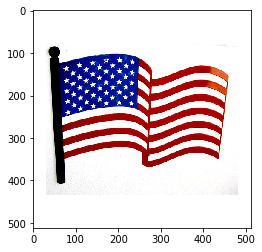

image shape: (2048, 2048)


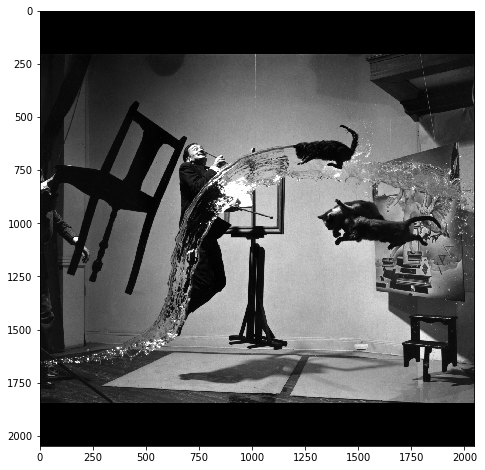

In [48]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread

image = imread('flag.png')
print('image shape:', image.shape)
plt.imshow(image)
plt.show()

image = imread('Dali.png')
print('image shape:', image.shape)
plt.figure(figsize=(8,8))
plt.imshow(image, cmap='gray')
plt.show()

### Task 11.9.16
다음 스펙을 가지는 프로시저를 작성해 보자.
- input: 부동소수들의 리스트들로 구성된 리스트로 나타낸 흑백 이미지
- output: 정수들의 리스트들로 구성된 리스트로 나타낸 대응하는 흑백 이미지. 이때, 정수들은 입력 이미지의 부동소두들을 반올림하고 그들의 절대값을 취하여 255보다 큰 값은 255 대체하여 얻어진다.

In [20]:
def image_round(image):
    return [[abs(round(p)) if abs(round(p)) <= 255 else 255 for p in row] for row in image]

vlist = [[-1.1,2.1,3.6,4.6],[2.4,3.4,4.6,256.6]]
print('vlist:', vlist)
print('image_round:', image_round(vlist))

vlist: [[-1.1, 2.1, 3.6, 4.6], [2.4, 3.4, 4.6, 256.6]]
image_round: [[1, 2, 4, 5], [2, 3, 5, 255]]


### Task 11.9.17 
이미지에 웨이브릿의 forwad, backward를 적용해 보자.

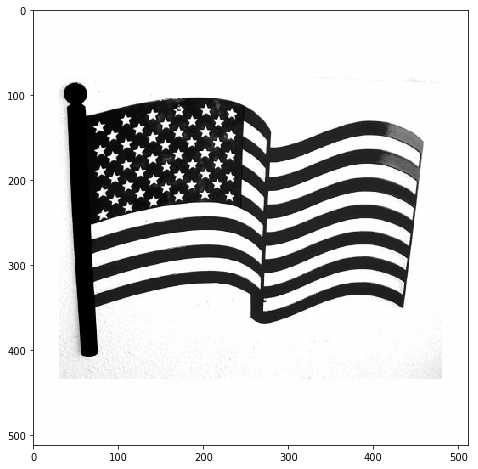

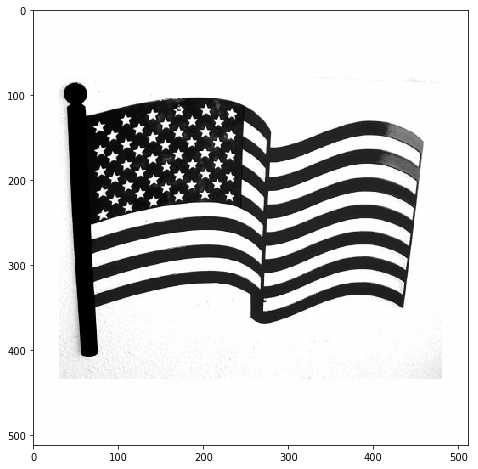

In [27]:
from image import *

image = file2image('flag.png')
image = color2gray(image)

image_wavelet = image_round(backward2d(forward2d(image)))
image2file(image_wavelet, 'flat_wavelet.png')
image2file(image, 'flag_gray.png')

plt.figure(figsize=(8,8))
plt.imshow(imread('flag_gray.png'))
plt.show()
plt.figure(figsize=(8,8))
plt.imshow(imread('flat_wavelet.png'))
plt.show()

### Task 11.9.18
suppress2d와 sparsity2d를 적용해 보자.

sparsity: 0.08162689208984375


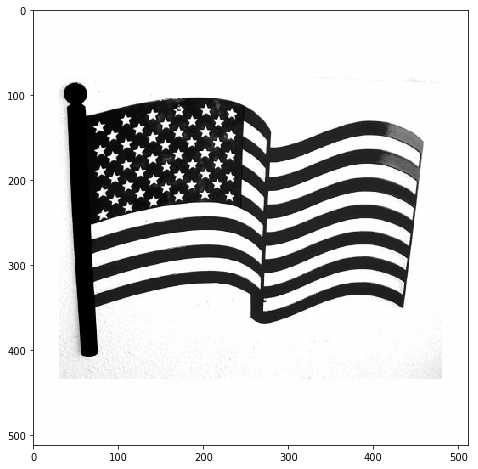

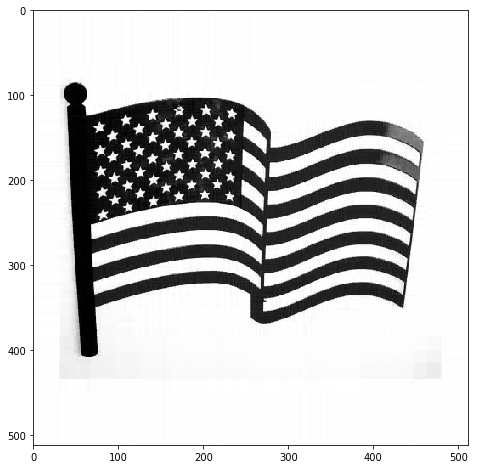

In [44]:
wavelet_image = forward2d(image)
wavelet_image = suppress2d(wavelet_image, 30)

print('sparsity:', sparsity2d(wavelet_image))

wavelet_image = image_round(backward2d(wavelet_image))
image2file(wavelet_image, 'flag_wavelet_suppress.png')

plt.figure(figsize=(8,8))
plt.imshow(imread('flag_gray.png'))
plt.show()
plt.figure(figsize=(8,8))
plt.imshow(imread('flag_wavelet_suppress.png'))
plt.show()

### Task 11.9.19
다른 이미지들에 대해 시험해 보자. 동일한 임계값으로 잘 동작하는지 확인해 보자.

sparsity: 0.02489471435546875
threshold: 30


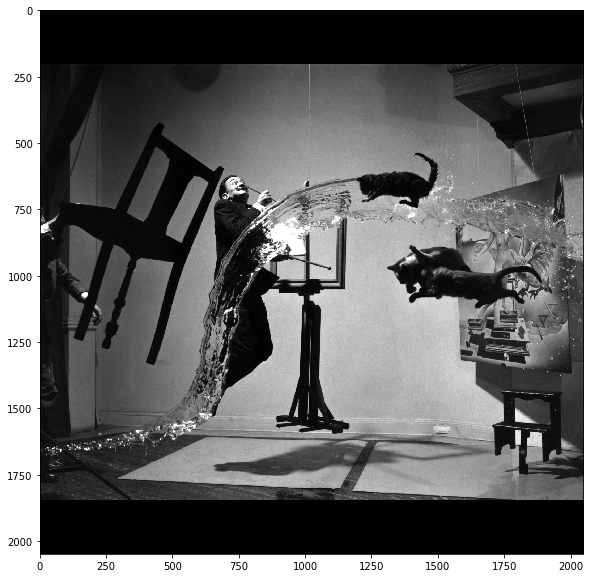

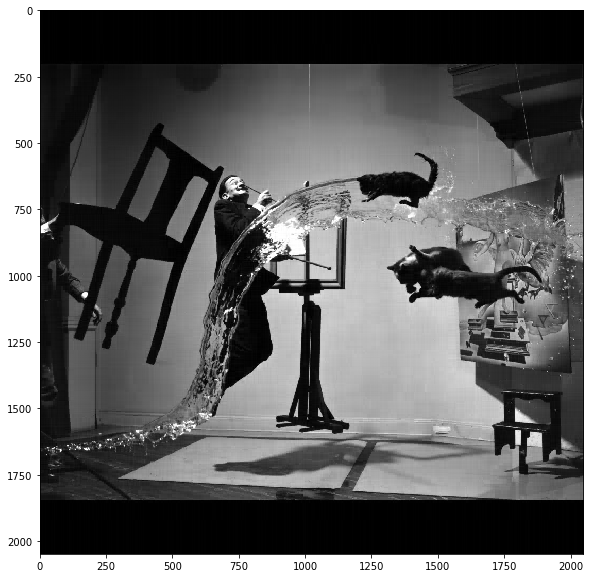

In [49]:
image = file2image('Dali.png')
image = color2gray(image)

wavelet_image = forward2d(image)
wavelet_image = suppress2d(wavelet_image, 30)

print('sparsity:', sparsity2d(wavelet_image))

wavelet_image = image_round(backward2d(wavelet_image))
image2file(wavelet_image, 'dali_wavelet_suppress.png')

print('threshold:', 30)
plt.figure(figsize=(10,10))
plt.imshow(imread('dali.png'), cmap='gray')
plt.show()
plt.figure(figsize=(10,10))
plt.imshow(imread('dali_wavelet_suppress.png'))
plt.show()